# 1. Imports and Configuration

In [1]:
# 1.0 - Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Display settings
pd.set_option('display.max_columns', None)


# 2. Load the Dataset

In [2]:
# 2.0 - Load Data
data = pd.read_csv('data.csv') 
print("Shape of data:", data.shape)
data.head()


Shape of data: (95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


# 3. Variable Overview

In [8]:
# 3.0 - Columns
data.columns.tolist()

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'CountryCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'Amount',
 'Value',
 'TransactionStartTime',
 'PricingStrategy',
 'FraudResult']

In [9]:
# 3.1 - Data Types
data.dtypes

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [10]:
# 3.2 - Summary Stats
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


# 4. Missing Value Analysis

In [15]:
# 4.0 - Check Missing Values
missing = data.isnull().sum()
missing



TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

### As we can see from the above there is no missing values. so it is well to continue.

# 5. Distribution of Numerical Features

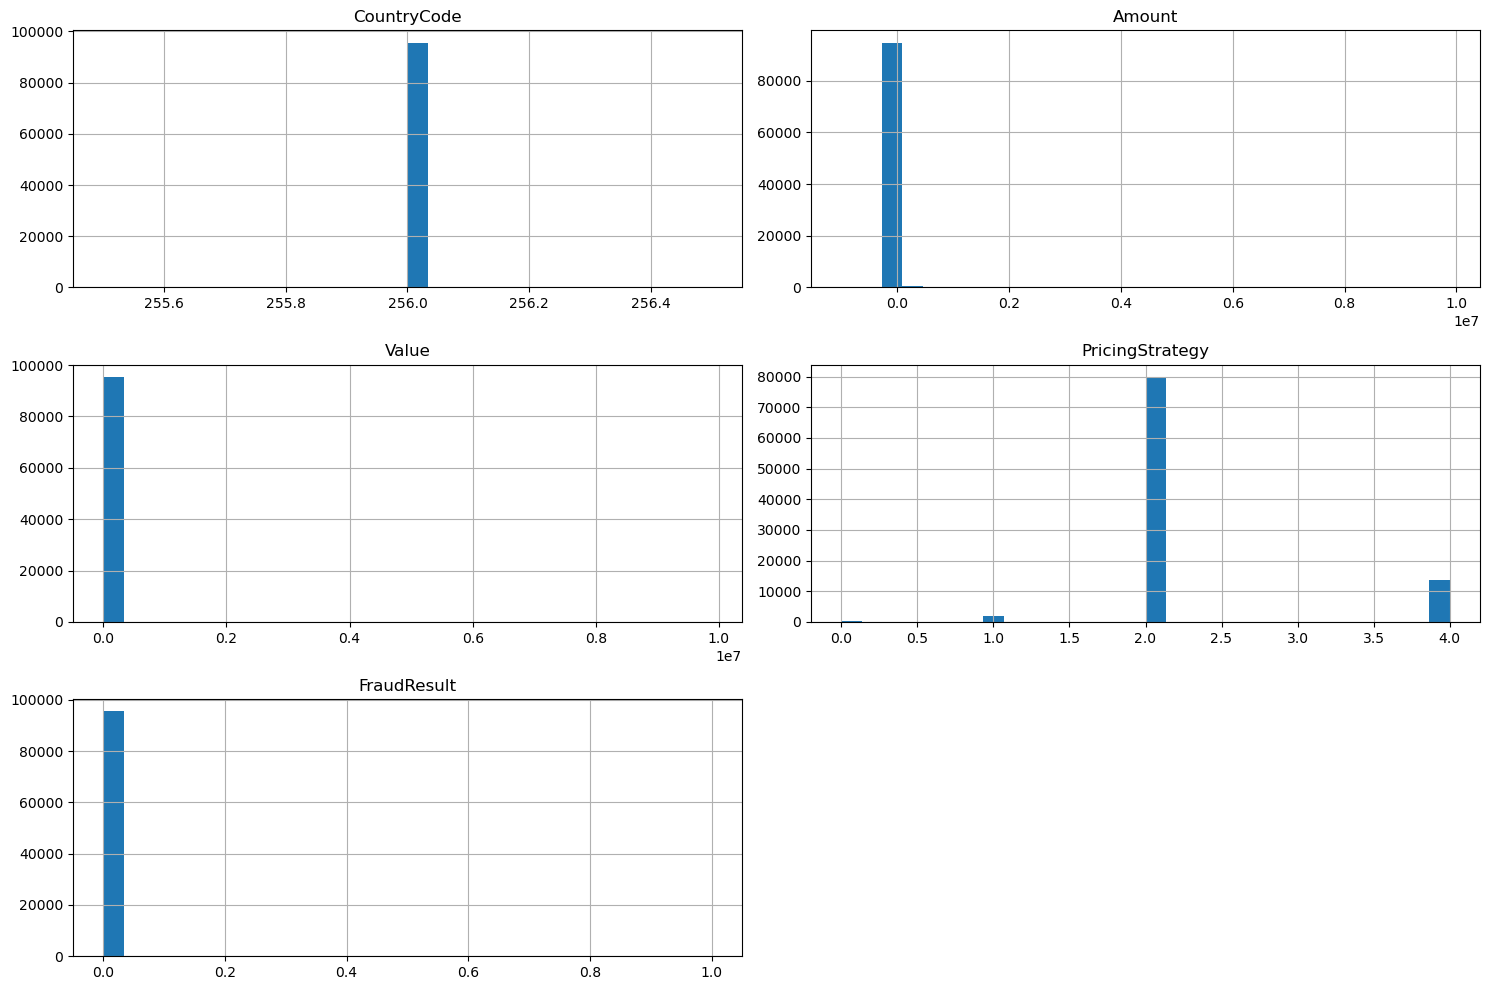

In [17]:
# 5.0 - Numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

# 5.1 - Histograms
data[num_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


# 6. Distribution of Categorical Features

In [18]:
# 6.0 - Categorical columns
cat_cols = data.select_dtypes(include='object').columns.tolist()

# 6.1 - Top Categories per Feature
for col in cat_cols:
    print(f"--- {col} ---")
    print(data[col].value_counts().head(10))
    print()


--- TransactionId ---
TransactionId
TransactionId_76871     1
TransactionId_74922     1
TransactionId_2737      1
TransactionId_28101     1
TransactionId_33267     1
TransactionId_135291    1
TransactionId_87468     1
TransactionId_134872    1
TransactionId_113925    1
TransactionId_16554     1
Name: count, dtype: int64

--- BatchId ---
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_86880      6
BatchId_107049     6
Name: count, dtype: int64

--- AccountId ---
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64

--- SubscriptionId ---
SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1

# 7. Correlation Heatmap

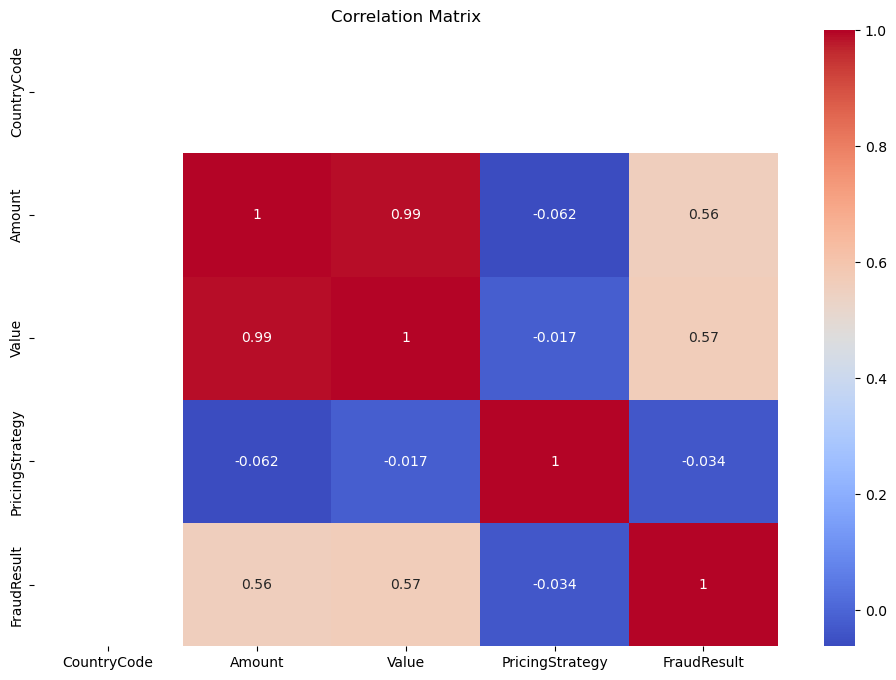

In [19]:
# 7.0 - Correlation Plot
plt.figure(figsize=(12, 8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## ✅ Interpretation of This Matrix
#### 💰 Amount and Value: Strong Positive Correlation (0.99)
* These two are almost identical in content (Value is the absolute of Amount).
* 👉 We might drop one to avoid multicollinearity when modeling.
#### 📅 Fraud Result and Pricing Strategy : Negative Correlation (-0.034)



# 8. Outlier Detection

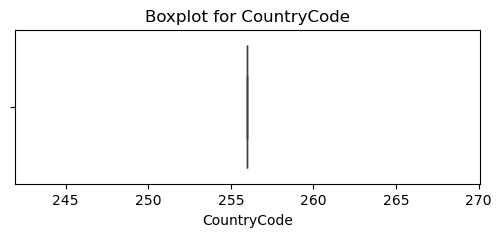

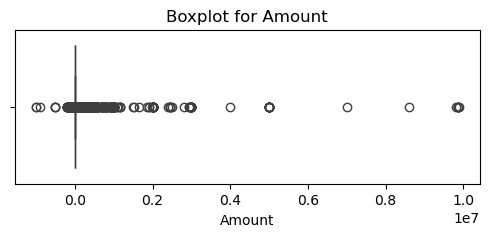

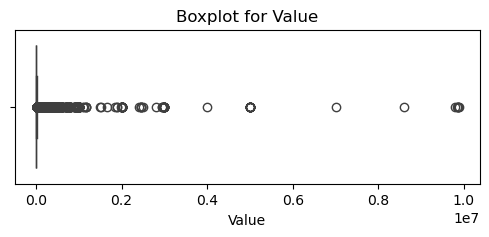

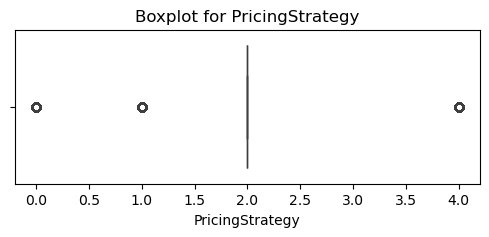

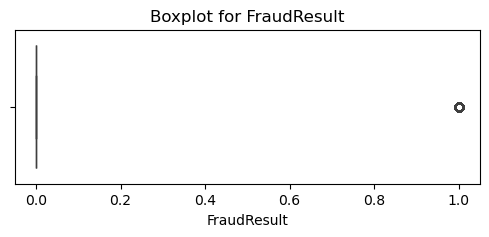

In [20]:
# 8.0 - Boxplots for numeric columns
for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


### # "Amount" column is right-skewed with extreme outliers.

### # Most transactions are concentrated in a few product categories.